<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Neural Networks

## *Data Science Unit 4 Sprint 2 Assignment 1*

## Define the Following:
You can add image, diagrams, whatever you need to ensure that you understand the concepts below.

### Input Layer:
    The input layer is the first layer which brings the inital data into the system for further processing through the hidden layers. It is the only part of the network which interacts with the data directly.  
    
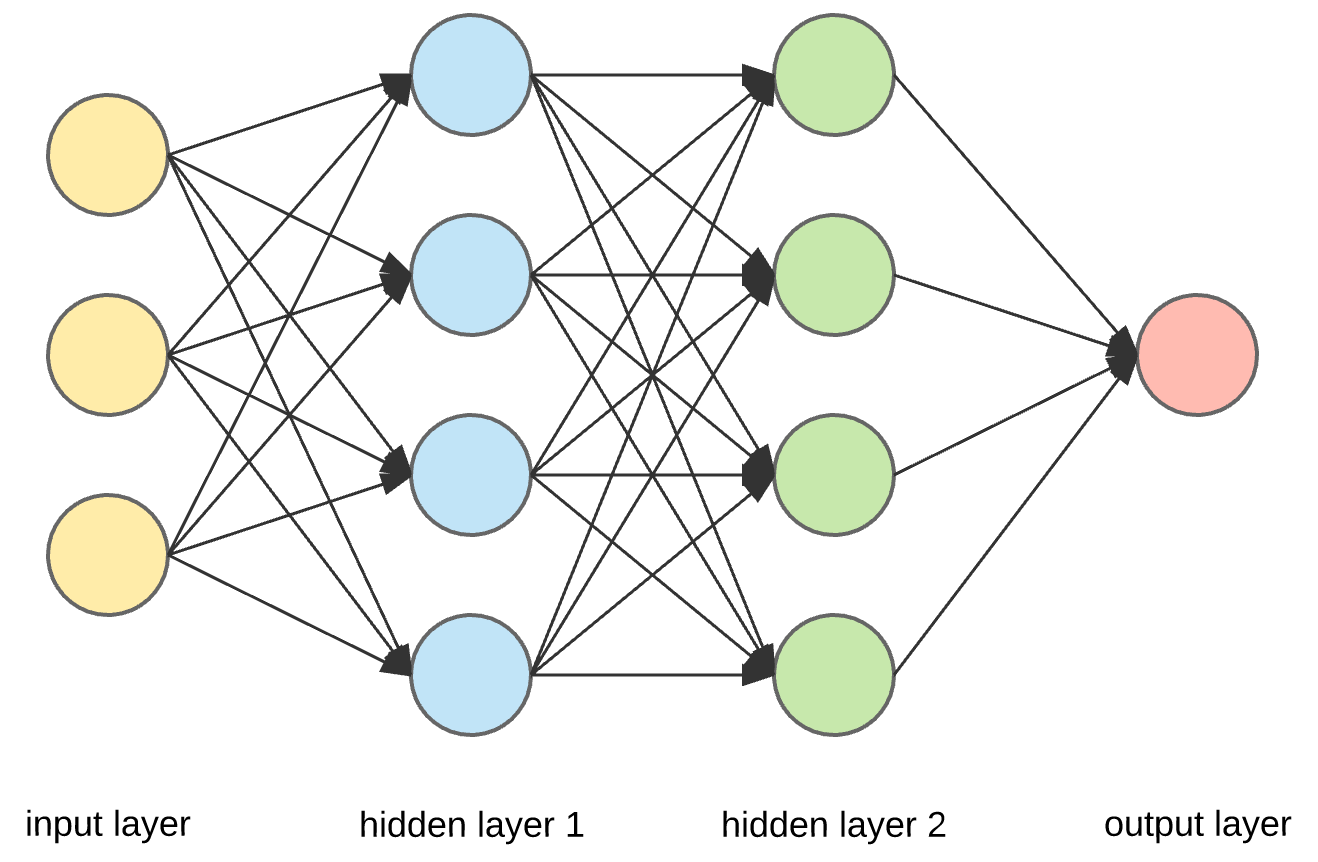

### Hidden Layer:
    The layers which come after the input layers which usually perform a function on the data from the input layer. The neurons within the hidden layer calculate the weighted sum of inputs and weights, add the bias and execute an activation function.


### Output Layer:
    Produces the final result from the given inputs - final output is usually a vector of values. 

### Neuron:
    The basic unit of a neural network. Neurons have dendrites (inputs), a cell nucleus(processor), and an axon(output). 

### Weight:
    A learnable parameter within a neural network that transforms input data within the hidden layers. As an input enters the neuron, it gets multiplied by the weight value.
   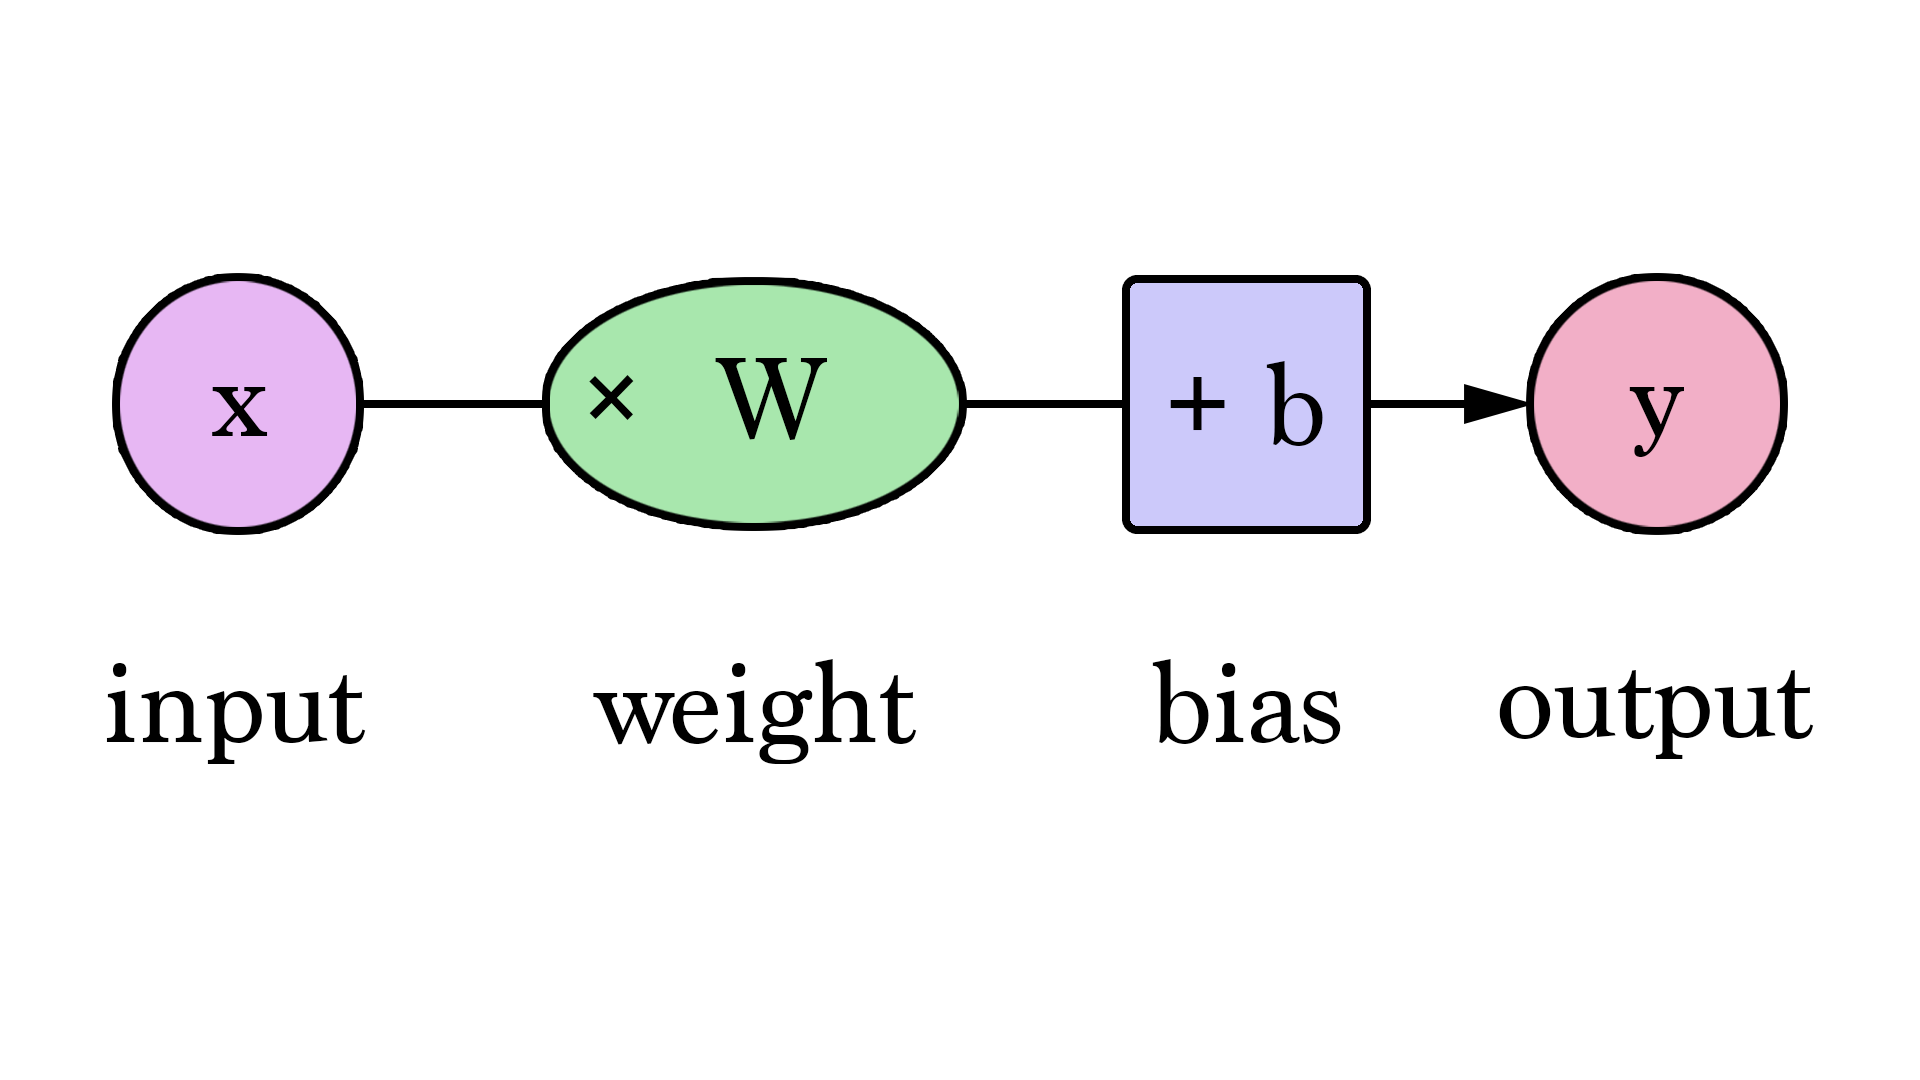

### Activation Function:
    Each neuron contains an activation function which determines whether it should be activated or not. In Artifical Neural Networks, they determine how much passes through each layer. 

### Node Map:


### Perceptron:
    A single layer neural network. A multi-layer perceptron would be considered a Neural Network.

## Inputs -> Outputs

### Explain the flow of information through a neural network from inputs to outputs. Be sure to include: inputs, weights, bias, and activation functions. How does it all flow from beginning to end?

First, the dataset is read through the input layer where the network directly interacts with the data. The data then goes through the hidden layers, where a weight and bias can be applied to the dataset through the sigmoid function. Then, the neuron goes through the activation function. This function will determine whether or not the neuron should be activated. 

## Write your own perceptron code that can correctly classify (99.0% accuracy) a NAND gate. 

| x1 | x2 | y |
|----|----|---|
| 0  | 0  | 1 |
| 1  | 0  | 1 |
| 0  | 1  | 1 |
| 1  | 1  | 0 |

In [35]:
import pandas as pd
import numpy as np


data = { 'x1': [0,1,0,1],
         'x2': [0,0,1,1],
         'y':  [1,1,1,0]
       }

df = pd.DataFrame.from_dict(data).astype('int')
df

,x1,x2,y
0,0,0,1
1,1,0,1
2,0,1,1
3,1,1,0


In [36]:
# define sigmoid activatiobn function & derivative 

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    sx = sigmoid(x)
    return sx * (1 - sx)


In [37]:
inputs = np.array([
                  [0, 0, 1],
                  [1, 0, 1],
                  [0, 1, 1],
                  [1, 1, 0]
])
inputs

array([[0, 0, 1],
       [1, 0, 1],
       [0, 1, 1],
       [1, 1, 0]])

In [38]:
# Initialize random weight
weights = 2 * np.random.random((3,1)) - 1 
weights

array([[ 0.81846473],
       [ 0.88374349],
       [-0.06894972]])

In [39]:
# Calculate weighted sum
weighted_sum = np.dot(inputs, weights)
weighted_sum

array([[-0.06894972],
       [ 0.74951501],
       [ 0.81479378],
       [ 1.70220822]])

In [40]:
# Calulate activated output
activated_output = sigmoid(weighted_sum)
activated_output

array([[0.4827694 ],
       [0.67907301],
       [0.69313009],
       [0.84582292]])

In [41]:
# Calculate error
error = correct_outputs - activated_output 
error

array([[ 0.5172306 ],
       [ 0.32092699],
       [ 0.30686991],
       [-0.84582292]])

In [42]:
adjustments = error * sigmoid_derivative(weighted_sum)
adjustments

array([[ 0.12915409],
       [ 0.06994053],
       [ 0.06527147],
       [-0.11030081]])

In [43]:
weights += np.dot(inputs.T, adjustments)
weights

array([[0.77810445],
       [0.83871415],
       [0.19541637]])

In [45]:
for iteration in range(10000):
    
    # Weighted sum of inputs / weights
    weighted_sum = np.dot(inputs, weights)
    
    # Activate!
    activated_output = sigmoid(weighted_sum)
    
    # Cac error
    error = correct_outputs - activated_output
    
    adjustments = error * sigmoid_derivative(weighted_sum)
    
    # Update the Weights
    weights += np.dot(inputs.T, adjustments)
    
print("Weights after training")
print(weights)

print("Output after training")
print(activated_output)

Weights after training
[[-2.58643118]
 [-2.58629465]
 [ 8.0173907 ]]
Output after training
[[0.99967042]
 [0.99564009]
 [0.99564068]
 [0.00563728]]


## Implement your own Perceptron Class and use it to classify a binary dataset: 
- [The Pima Indians Diabetes dataset](https://raw.githubusercontent.com/ryanleeallred/datasets/master/diabetes.csv) 

You may need to search for other's implementations in order to get inspiration for your own. There are *lots* of perceptron implementations on the internet with varying levels of sophistication and complexity. Whatever your approach, make sure you understand **every** line of your implementation and what its purpose is.

In [59]:
diabetes = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/diabetes.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Although neural networks can handle non-normalized data, scaling or normalizing your data will improve your neural network's learning speed. Try to apply the sklearn `MinMaxScaler` or `Normalizer` to your diabetes dataset. 

In [60]:
from sklearn.preprocessing import MinMaxScaler, Normalizer
from sklearn.metrics import accuracy_score

feats = list(diabetes)[:-1]
scaler = MinMaxScaler()

x = scaler.fit_transform(diabetes[feats])
x

array([[0.35294118, 0.74371859, 0.59016393, ..., 0.50074516, 0.23441503,
        0.48333333],
       [0.05882353, 0.42713568, 0.54098361, ..., 0.39642325, 0.11656704,
        0.16666667],
       [0.47058824, 0.91959799, 0.52459016, ..., 0.34724292, 0.25362938,
        0.18333333],
       ...,
       [0.29411765, 0.6080402 , 0.59016393, ..., 0.390462  , 0.07130658,
        0.15      ],
       [0.05882353, 0.63316583, 0.49180328, ..., 0.4485842 , 0.11571307,
        0.43333333],
       [0.05882353, 0.46733668, 0.57377049, ..., 0.45305514, 0.10119556,
        0.03333333]])

In [61]:
y = diabetes.iloc[:, 8].values
y

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

In [62]:
##### Update this Class #####

class Perceptron:
    
    def __init__(self, niter = 10000):
        self.niter = niter
    
    def __sigmoid(self, x):
         return 1 / (1 + np.exp(-x))
    
    def __sigmoid_derivative(self, x):
        sx = sigmoid(x)
        return sx * (1-sx)

    def fit(self, X, y):

        # Randomly Initialize Weights
        weights = np.zeros(x.shape[1])

        for i in range(self.niter):
            # Weighted sum of inputs / weights
            weighted_sum = np.dot(X,weights)
            
            # Activate!
            activated_output = sigmoid(weighted_sum)
            
            # Cac error
            error = y - activated_output
            adj = error * sigmoid_derivative(activated_output)

            # Update the Weights
            weights += np.dot(x.T, adj)


    def predict(self, X):
        
        return activated_output

## Stretch Goals:

- Research "backpropagation" to learn how weights get updated in neural networks (tomorrow's lecture). 
- Implement a multi-layer perceptron. (for non-linearly separable classes)
- Try and implement your own backpropagation algorithm.
- What are the pros and cons of the different activation functions? How should you decide between them for the different layers of a neural network?